# Precision, Recall, Sensibilidade, Especificidade e Curva ROC

Esses conceitos são fundamentais para avaliar o desempenho de modelos de classificação em aprendizado de máquina e estatística. Aqui está uma explicação detalhada:

---

## **1. Precision (Precisão):**
- **Definição:** Mede a proporção de predições positivas corretas em relação a todas as predições positivas feitas pelo modelo.
- **Fórmula:**  
  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$
- **Interpretação:**  
  Se o modelo prevê que algo pertence à classe positiva, a precisão indica a probabilidade de estar certo.  
  É útil quando o custo de um **falso positivo** é alto.

---

## **2. Recall (Revocação ou Sensibilidade):**
- **Definição:** Mede a proporção de predições positivas corretas em relação a todos os casos positivos reais.
- **Fórmula:**  
  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$
- **Interpretação:**  
  Indica a capacidade do modelo de identificar corretamente os casos positivos.  
  É importante quando o custo de um **falso negativo** é alto (ex.: diagnóstico médico).

---

## **3. Sensibilidade:**
- **Definição:**  
  É outro nome para o **recall**. Mede a habilidade do modelo em identificar corretamente os verdadeiros positivos.  
  É especialmente relevante em contextos onde **não perder positivos é essencial**.

---

## **4. Especificidade:**
- **Definição:** Mede a proporção de predições negativas corretas em relação a todos os casos negativos reais.
- **Fórmula:**  
  $$
  \text{Especificidade} = \frac{\text{True Negatives (TN)}}{\text{True Negatives (TN)} + \text{False Positives (FP)}}
  $$
- **Interpretação:**  
  Indica a capacidade do modelo de evitar falsos positivos.  
  É importante em contextos onde **rotular algo como positivo incorretamente é problemático**.

---

## **5. Curva ROC (Receiver Operating Characteristic):**
- **Definição:** É um gráfico que mostra a relação entre a **sensibilidade (recall)** e a **especificidade** para diferentes limiares de decisão.
- **Eixo X:** $1 - \text{Especificidade}$ (Taxa de Falsos Positivos).  
- **Eixo Y:** Sensibilidade (Recall ou Taxa de Verdadeiros Positivos).
- **Área sob a curva (AUC):**  
  $$
  \text{AUC (Area Under the Curve)}
  $$  
  Representa a capacidade geral do modelo de separar as classes. Um valor de AUC próximo de 1 indica um bom desempenho, enquanto um valor próximo de 0,5 indica desempenho semelhante ao acaso.

- **Interpretação:**  
  - Um modelo perfeito terá uma curva que passa pelo canto superior esquerdo (100% de recall e 100% de especificidade).  
  - A curva ajuda a entender o desempenho do modelo em diferentes limiares.

---

## **Exemplo Resumido:**
Imagine um modelo que prevê se um paciente tem uma doença:  
- **TP:** Paciente doente identificado corretamente.  
- **FP:** Paciente saudável identificado como doente.  
- **TN:** Paciente saudável identificado corretamente.  
- **FN:** Paciente doente identificado como saudável.  

### Métricas:
- **Precisão:** Quantos dos pacientes identificados como doentes estão realmente doentes?  
- **Recall (Sensibilidade):** Quantos pacientes doentes o modelo conseguiu identificar?  
- **Especificidade:** Quantos pacientes saudáveis o modelo não classificou erroneamente como doentes?  
- **Curva ROC:** Avalia o equilíbrio entre sensibilidade e especificidade para diferentes cenários.



Precision: 1.0
Recall: 1.0
Specificity per class: [np.float64(1.0), np.float64(1.0), np.float64(1.0)]
ROC AUC: 1.0


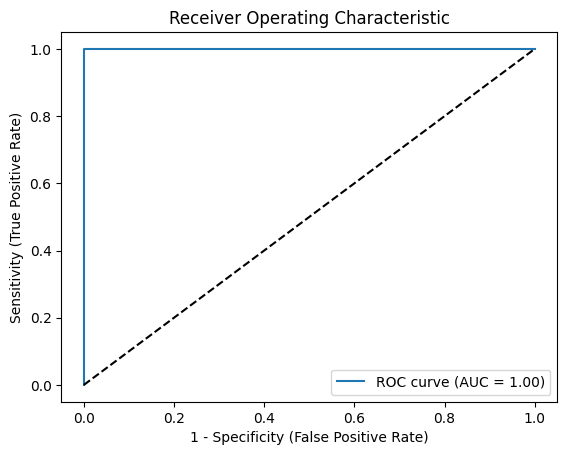

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Importando as bibliotecas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Carregando o dataset Iris
data = load_iris()
X = data.data  # Features
y = data.target  # Rótulos (classes)

# Dividindo o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo
model = LogisticRegression(max_iter=200)

# Treinando o modelo
model.fit(X_train, y_train)

# Prevendo as classes do conjunto de teste
y_pred = model.predict(X_test)

# Prevendo as probabilidades para a curva ROC
y_score = model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
print("Recall:", recall)

specificity_per_class = []
for i in range(len(data.target_names)):  # Para cada classe
    # Definir a classe atual como positiva e as outras como negativas
    binary_y_test = (y_test == i).astype(int)
    binary_y_pred = (y_pred == i).astype(int)
    
    # Confusão binária para a classe atual
    tn, fp, fn, tp = confusion_matrix(binary_y_test, binary_y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificity_per_class.append(specificity)

print("Specificity per class:", specificity_per_class)


# Curva ROC para cada classe
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Relatório completo com várias métricas
report = classification_report(y_test, y_pred)
print(report)



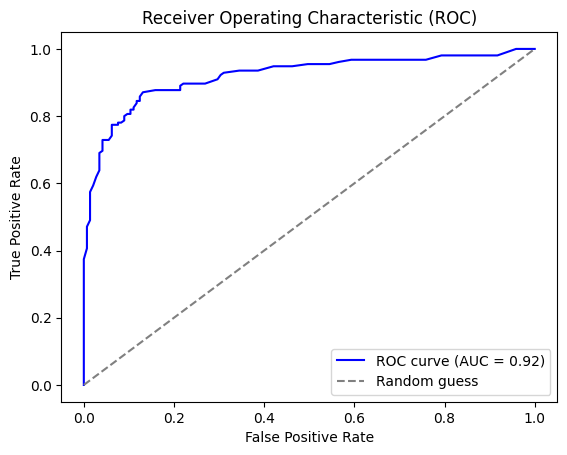

In [5]:
#Exemplo de plotagem da curva ROC

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Criando um dataset exemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtendo as probabilidades para a classe positiva
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Conclusão:
O código acima calcula e imprime várias métricas, além de exibir a curva ROC para a classificação, e um relatório completo de desempenho do modelo. A métrica precision e recall será calculada para todas as classes (usando a média 'macro' para lidar com múltiplas classes), e a especificidade será derivada da matriz de confusão.

### Importante:
- **Precision** e **Recall** podem ser calculados com a média de várias classes (`average='macro'`).
- Para múltiplas classes, a curva ROC é gerada para cada classe individualmente. A AUC é a área sob a curva para essa classe.
Esse é um exemplo básico usando o Iris dataset. Em problemas do mundo real, os dados e modelos podem ser mais complexos, mas o processo de cálculo das métricas é o mesmo.


# Média Macro e Média Ponderada para Precision e Recall

Quando você calcula **precision** e **recall** para um modelo de classificação com múltiplas classes, é necessário decidir como combinar os valores dessas métricas para obter um valor único. A opção de usar a **média macro** é uma maneira de fazer essa agregação.

## Média Macro (Macro Average)

A **média macro** calcula a **média simples** das métricas para cada classe, **tratando cada classe igualmente**, independentemente de sua frequência no conjunto de dados. Ou seja, ela não leva em consideração o número de amostras de cada classe, apenas o desempenho do modelo em cada uma delas.

### Como funciona?

1. **Precision e Recall por classe:**  
   Para um problema de classificação com múltiplas classes, o modelo calcula **precision** e **recall** para cada classe individualmente.

2. **Média simples de cada classe:**  
   Depois, calcula-se a média desses valores de **precision** e **recall** de todas as classes.

### Exemplo

Considere um modelo de classificação com 3 classes: **Classe A**, **Classe B** e **Classe C**. O modelo pode ter os seguintes valores de **precision** e **recall** para cada classe:

- **Classe A:**
  - Precision = 0.80
  - Recall = 0.75
- **Classe B:**
  - Precision = 0.90
  - Recall = 0.85
- **Classe C:**
  - Precision = 0.70
  - Recall = 0.65

A **média macro** seria a média simples desses valores:

- **Precision (macro):**
$$
  \text{Precision}_{\text{macro}} = \frac{0.80 + 0.90 + 0.70}{3} = 0.80
$$

- **Recall (macro):**
$$
  \text{Recall}_{\text{macro}} = \frac{0.75 + 0.85 + 0.65}{3} = 0.75
$$

Portanto, a **média macro** para **precision** seria 0.80 e para **recall** seria 0.75.

### Vantagens e Desvantagens da Média Macro

#### Vantagens:
- **Igualdade entre as classes:** A média macro trata todas as classes igualmente, independentemente do seu tamanho no conjunto de dados. Isso é útil quando queremos avaliar o modelo de forma equilibrada, sem que classes majoritárias dominem a métrica.
- **Atenção a classes minoritárias:** Se uma classe minoritária for mal classificada, ela será igualmente considerada no cálculo da média macro, destacando a importância do modelo em aprender a distinguir todas as classes.

#### Desvantagens:
- **Não leva em conta o desequilíbrio das classes:** Como a média macro não pondera as classes com base em sua frequência, ela pode ser menos representativa em cenários onde há um desequilíbrio de classes (por exemplo, quando algumas classes possuem muito mais amostras do que outras).

---

## Média Ponderada (Weighted Average)

Se você quiser levar em consideração o desequilíbrio das classes, pode usar a **média ponderada**. Na média ponderada, as métricas de **precision** e **recall** de cada classe são ponderadas pelo número de amostras dessa classe no conjunto de dados.

Por exemplo, se uma classe tem muitas mais amostras do que outra, a média ponderada vai dar mais peso à classe maior, refletindo seu impacto no desempenho do modelo. Isso é útil em cenários de **classes desbalanceadas**.

---

## Resumo

- **Média Macro:** Calcula a média simples das métricas de cada classe, sem considerar o número de amostras em cada classe.
- **Média Ponderada:** Calcula a média das métricas, levando em conta o número de amostras em cada classe.

Escolher entre média macro ou ponderada depende do tipo de problema que você está enfrentando e da importância relativa que você deseja dar a cada classe no cálculo das métricas.
